#**ANALYSE DES SENTIMENTS DE LA PLATEFORME DEEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importation des modules
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns

**IMPORTATIONS DES PATHS DE MES DATASETS**

In [ ]:
# Voir la liste de tous nos fichier
directory = '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets'
files = glob.glob(directory + '/*')
files

['/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_capteras.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oyster_getapps.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/oysterhr_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/remote_truspilot.csv',
 '/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/rippling_truspilot.csv']

## **Data Cleaning et Traitement des données de la plateforme deel**

In [ ]:
# Création de la fonction qui gère le datacleaning par défaut de toutes les datasets
def wrangle(path):
  # Read the datasets
  df = pd.read_csv(path)
  # Transformer le type des colonnes
    # Convertir la première colonne en str
  df['Plateforme'] = df['Plateforme'].astype(str)
  df['Avis'] = df['Avis'].astype(str)
  # Remplaçons les virgules par les points
  df['Notes sur 5'] = df['Notes sur 5'].str.replace(',', '.')
  df['Notes sur 5'] = df['Notes sur 5'].astype(float)

    # Voir la moyenne de la colonne notes
  mean_notes = df['Notes sur 5'].mean()
  df['Notes sur 5'] = df['Notes sur 5'].fillna(mean_notes)
  df['Notes sur 5'] = df['Notes sur 5'].astype(int)
  return df

Nous disposons de deux datasets venant des resultats des scrappings pour chez Deel.com, donc nous allons les exploiter

In [ ]:
df_deel2 = pd.read_csv('/content/drive/MyDrive/TALENT VIRTUEL/DATA SCRAPPING/all_datasets/deel_truspilot.csv')
df_deel2.head()

# Supprimer les colonnes inutiles
df_deel2 = df_deel2.drop(columns = ['Utilisateur', 'Nombre de commentaires', 'Position Géographique', 'Date'], axis=0)

In [ ]:
df_deel2['Notes sur 5'].unique()

array([5, 2, 1, 4, 3])

In [ ]:
# Lire le datasets deel_capteras
df_deel1 = wrangle(files[0])
df_deel1.head()

,Plateforme,Avis,Notes sur 5
0,Deel,Outil simple et utile !,4
1,Deel,Trop lent,4
2,Deel,Gestion de Paie,4
3,Deel,Deel Multiplies our Team,4
4,Deel,Great app and customer support,4


In [ ]:
# Remplacer les trois premières phrases de la colonne "Avis" par leurs traductions en anglais
df_deel1.loc[0, 'Avis'] = 'Simple and useful tool!'
df_deel1.loc[1, 'Avis'] = 'Too slow'
df_deel1.loc[2, 'Avis'] = 'Payroll management'

In [ ]:
# Concaténation
deel_df = pd.concat([df_deel1, df_deel2], ignore_index = True)
df = deel_df

**Simple Analyse des Scores**

<Axes: title={'center': 'Histogramme des avis'}, xlabel='Notes sur 5'>

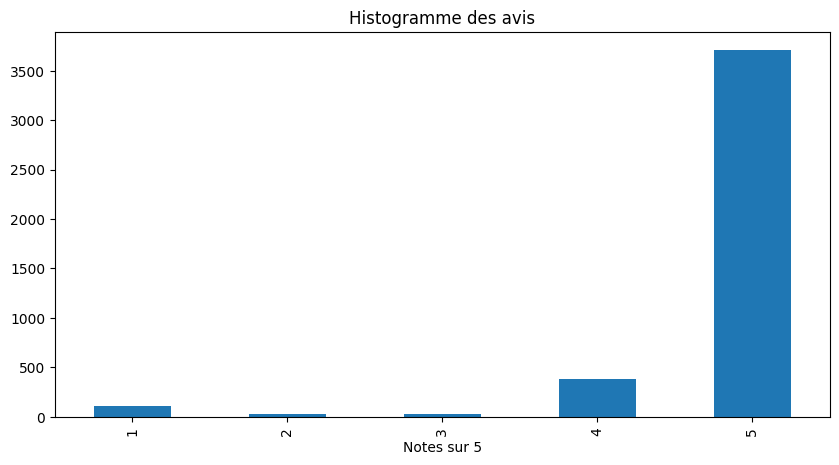

In [ ]:
df['Notes sur 5'].value_counts().sort_index().plot(kind='bar', title = "Histogramme des avis",
                                                   xlabel = "Notes sur 5",
                                                   figsize=(10, 5))

# **ANALYSE TEXTUELLE**

**Importation de la bibliothèque NLTK**:

In [ ]:
# Importation des modules
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
# Assurez-vous d'avoir importé pandas
import pandas as pd

# Supposez que votre DataFrame est nommé df et qu'il est déjà nettoyé
# Par exemple, vous avez un DataFrame nettoyé comme suit :
# df = ...

# Spécifiez le chemin où vous souhaitez enregistrer le fichier CSV
chemin_du_fichier = "/content/drive/MyDrive/TALENT VIRTUEL/DATA CLEANING/deel/deel_nettoye.csv"

# Enregistrez le DataFrame dans un fichier CSV
df.to_csv(chemin_du_fichier, index=False)  # Si vous ne voulez pas inclure l'index dans le fichier CSV


# ************** **FIN********************

**UTILISATION DE VADER POUR LA GESTION DES SCORES DES SENTIMENTS (POSITIVE | NEGATIVE | NEUTRE)**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [ ]:
# Instancier l'analyseur des sentiments
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
exemple = df['Avis'][550]

In [ ]:
# Voir pour notre exemple les scores des polarités
sia.polarity_scores(exemple)

{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'compound': 0.5719}

In [ ]:
df.index

RangeIndex(start=0, stop=4254, step=1)

In [ ]:
len(df)

4254

In [ ]:
# Créer une liste de valeurs pour la colonne ID
id_values = ['DEEL' + str(i) for i in range(1, len(df) + 1)]

# Ajouter la colonne ID au DataFrame
df['ID'] = id_values


In [ ]:
df.head()

,Plateforme,Avis,Notes sur 5,ID
0,Deel,Simple and useful tool!,4,DEEL1
1,Deel,Too slow,4,DEEL2
2,Deel,Payroll management,4,DEEL3
3,Deel,Deel Multiplies our Team,4,DEEL4
4,Deel,Great app and customer support,4,DEEL5


In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text = row['Avis']
  myid = row['ID']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/4254 [00:00<?, ?it/s]

In [ ]:
# Voir le résultats
res

{'DEEL1': {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4926},
 'DEEL2': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'DEEL3': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'DEEL4': {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 'DEEL5': {'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'compound': 0.7783},
 'DEEL6': {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.4785},
 'DEEL7': {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.6369},
 'DEEL8': {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249},
 'DEEL9': {'neg': 0.0, 'neu': 0.44, 'pos': 0.56, 'compound': 0.6249},
 'DEEL10': {'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound': 0.6696},
 'DEEL11': {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588},
 'DEEL12': {'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249},
 'DEEL13': {'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859},
 'DEEL14': {'neg': 0.133, 'neu': 0.867, 'pos': 0.0, 'compound': -0.0191},
 'DEEL15': {'

In [ ]:
# Transformer ça en dataframe pour bien le manipuler
df_vader = pd.DataFrame(res).T
df_vader = df_vader.reset_index().rename(columns={'index':'ID'})
df_vader = df_vader.merge(df, how='left')

In [ ]:
df_vader.head()

,ID,neg,neu,pos,compound,Plateforme,Avis,Notes sur 5
0,DEEL1,0.0,0.484,0.516,0.4926,Deel,Simple and useful tool!,4
1,DEEL2,0.0,1.000,0.000,0.0000,Deel,Too slow,4
2,DEEL3,0.0,1.000,0.000,0.0000,Deel,Payroll management,4
3,DEEL4,0.0,1.000,0.000,0.0000,Deel,Deel Multiplies our Team,4
4,DEEL5,0.0,0.306,0.694,0.7783,Deel,Great app and customer support,4


**Affichage des graphiques du Vaders**

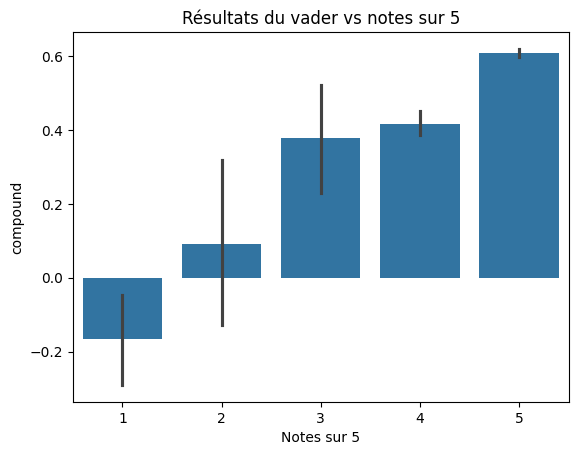

In [ ]:
ax = sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'compound')
ax.set_title("Résultats du vader vs notes sur 5")
plt.show()

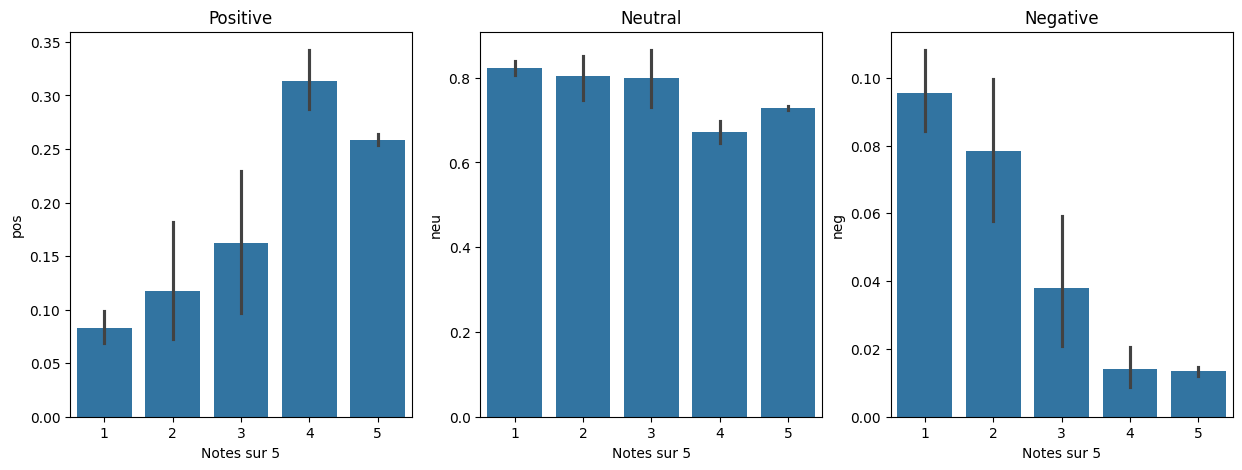

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(data = df_vader, x ='Notes sur 5', y = 'pos',  ax = axs[0])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neu', ax = axs[1])
sns.barplot(data = df_vader, x = 'Notes sur 5', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

#Pré-entrainement du modèle

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# Utilisation d'un modèle pré-entrainé
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Voir le score des textes  avec notre VADER
print(exemple)

sia.polarity_scores(text)

Easy peezy I am six months into…Easy peezy I am six months into figuring out passive and residual incomes and paths of each this app was simple and fastDate of experience: February 21, 2024


{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'compound': 0.9201}

In [ ]:
print(exemple)

Easy peezy I am six months into…Easy peezy I am six months into figuring out passive and residual incomes and paths of each this app was simple and fastDate of experience: February 21, 2024


In [ ]:
# Exécuter notre modèle de NLP basé sur Roberta Model
encoded_text = tokenizer(exemple, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.101121336,
 'roberta_neu': 0.47623017,
 'roberta_pos': 0.4226485}

In [ ]:
# Utilisationn du modèle sur notre datasests
def polarity_scores_roberta(exemple):
    encoded_text = tokenizer(exemple, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    return scores_dict

In [ ]:
# Passer à l'analyse des scores des polarités pour tout le datasets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
 try:
      text = row['Avis']
      myid = row['ID']
      vader_result = sia.polarity_scores(text)
      vader_result_rename = {}
      for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
      robertar_result = polarity_scores_roberta(text)

      robertar_result = polarity_scores_roberta(text)
      both = {**vader_result, **robertar_result}
      res[myid] = both
 except RuntimeError:
      print(f'Stoppé pour le numéro {myid}')


NameError: name 'tqdm' is not defined

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index':'ID'})
results_df = results_df.merge(df, how='left')

In [ ]:
results_df

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,DEEL1,0.000,0.484,0.516,0.4926,0.003502,0.056892,0.939606,Deel,Simple and useful tool!,4
1,DEEL2,0.000,1.000,0.000,0.0000,0.864240,0.123792,0.011968,Deel,Too slow,4
2,DEEL3,0.000,1.000,0.000,0.0000,0.175236,0.762741,0.062022,Deel,Payroll management,4
3,DEEL4,0.000,1.000,0.000,0.0000,0.034305,0.856492,0.109202,Deel,Deel Multiplies our Team,4
4,DEEL5,0.000,0.306,0.694,0.7783,0.008185,0.042623,0.949192,Deel,Great app and customer support,4
...,...,...,...,...,...,...,...,...,...,...,...
4248,DEEL4250,0.073,0.704,0.223,0.9651,0.004153,0.013962,0.981885,deel.com,Excellent customer service!!I really love and ...,5
4249,DEEL4251,0.042,0.737,0.221,0.8881,0.001088,0.010560,0.988352,deel.com,Great service offering!!The Deel platform has ...,5
4250,DEEL4252,0.107,0.848,0.046,-0.4215,0.045635,0.315211,0.639153,deel.com,Hire internationallyWe used to avoid hiring in...,5
4251,DEEL4253,0.000,0.771,0.229,0.8686,0.002337,0.023372,0.974291,deel.com,Very recommended!Deel allowed me to control ho...,5


###**Comparer les deux modèles**

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Notes sur 5'],
      dtype='object')

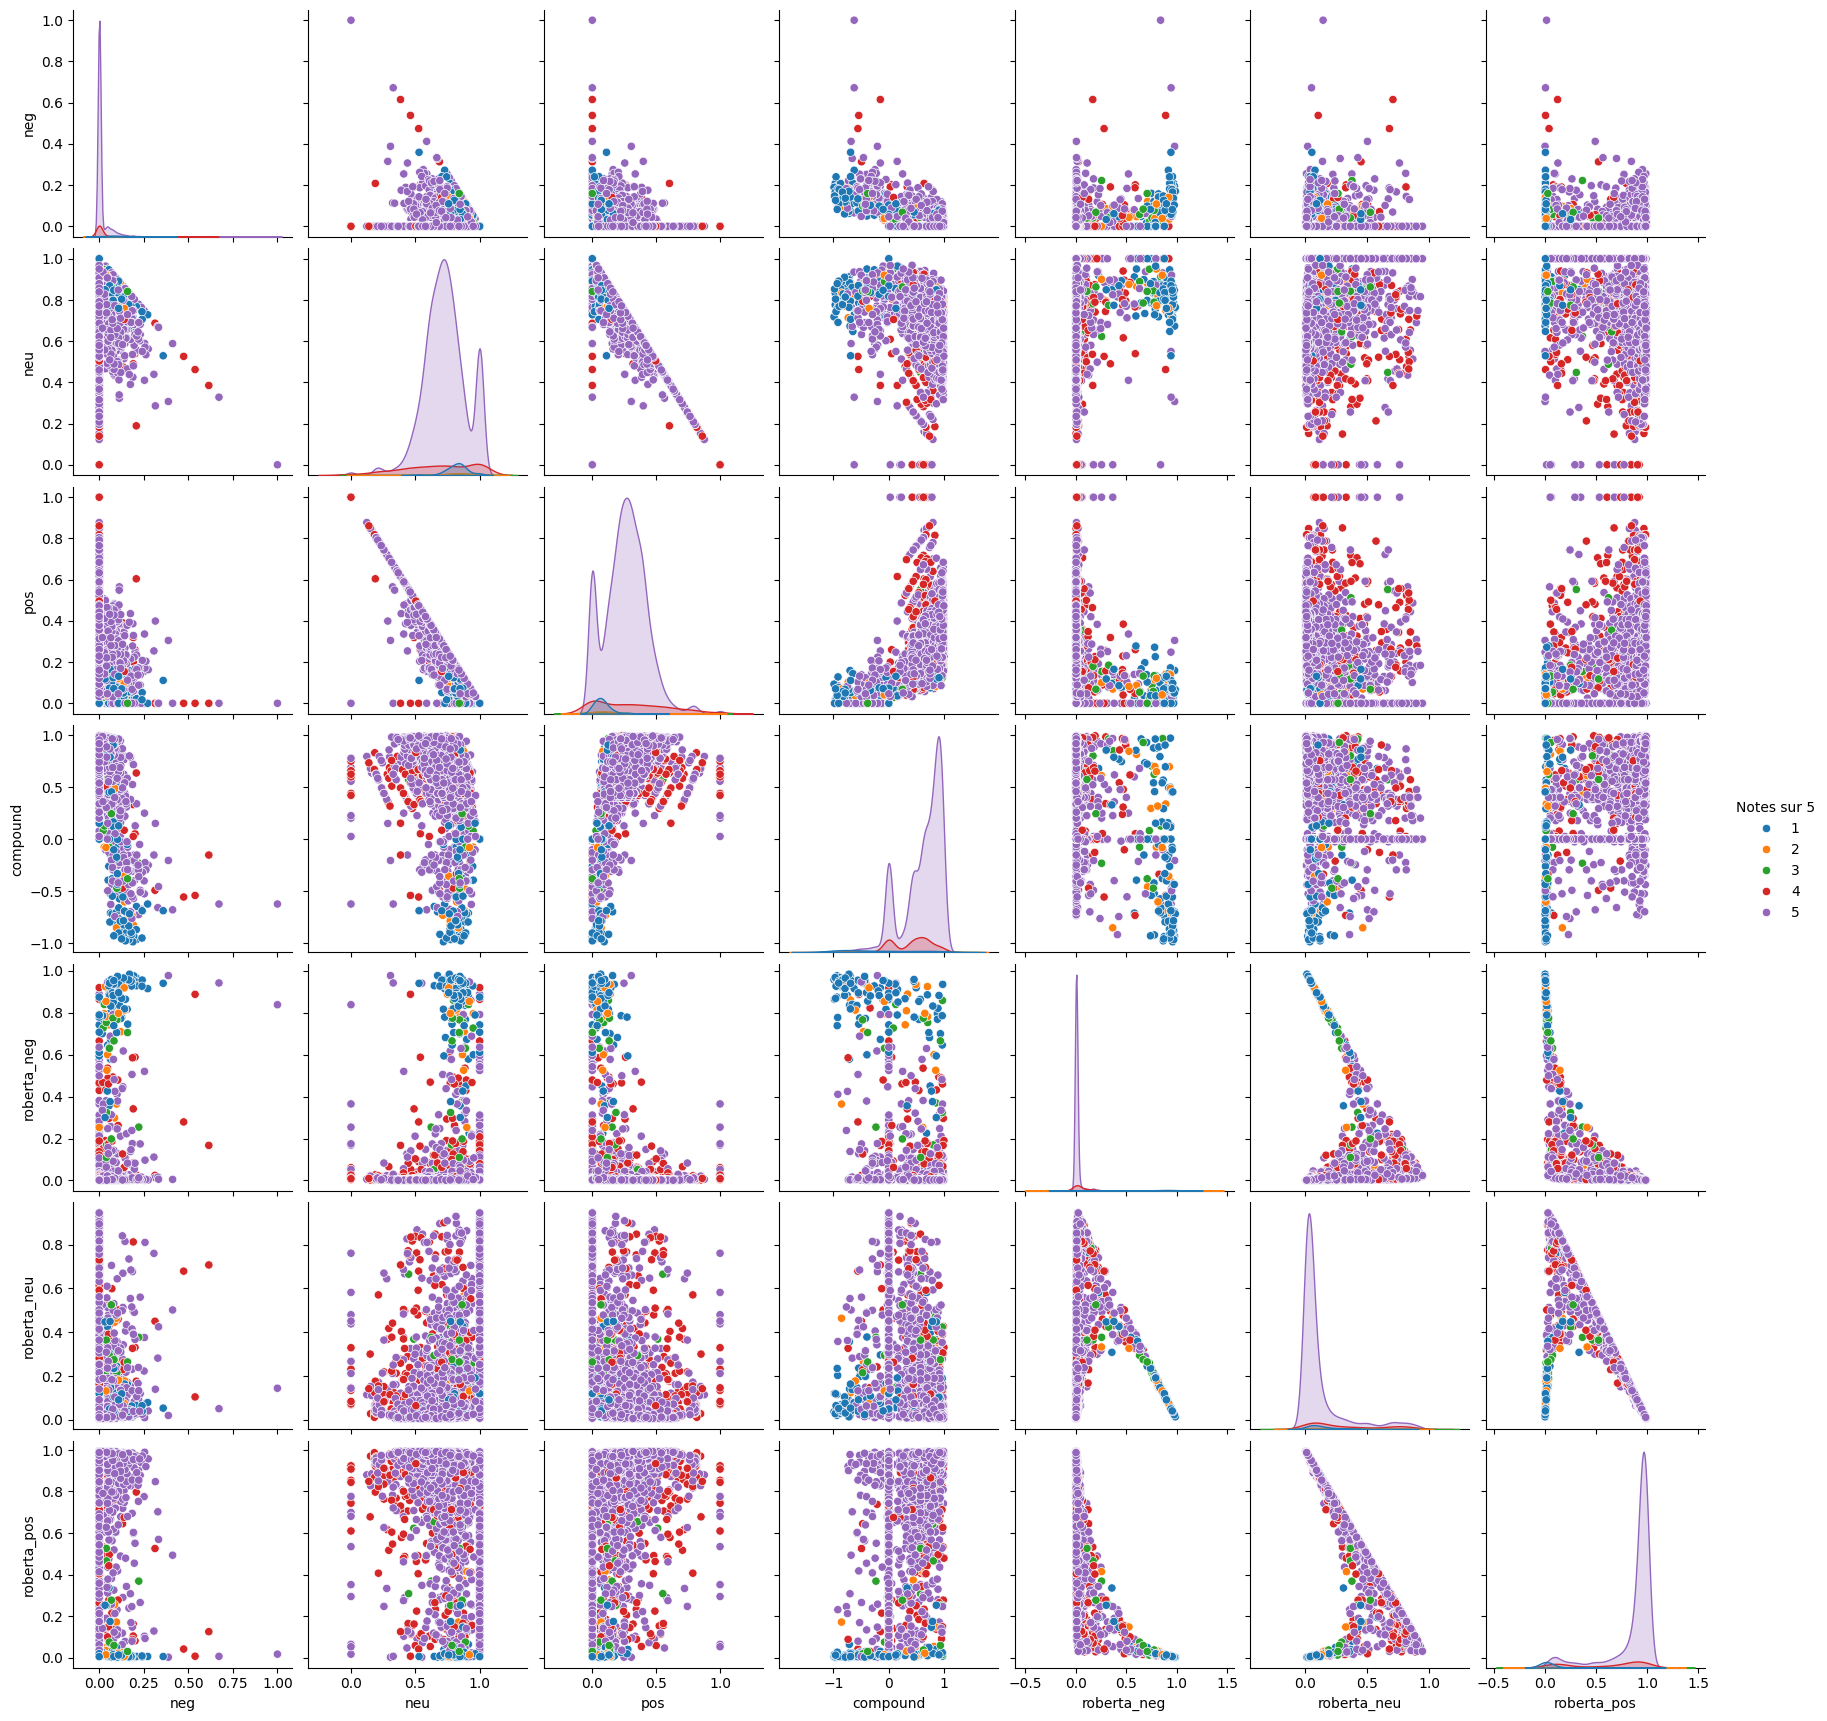

In [ ]:
sns.pairplot(data = results_df, vars = ['neg', 'neu', 'pos', 'compound',
                                       'roberta_neg', 'roberta_neu',
                                       'roberta_pos'],
             hue='Notes sur 5',
             palette = 'tab10')
plt.show()

In [ ]:
# Tester notre modèles sur nos données
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Notes sur 5
0,DEEL1,0.0,0.484,0.516,0.4926,0.003502,0.056892,0.939606,Deel,Simple and useful tool!,4
1,DEEL2,0.0,1.000,0.000,0.0000,0.864240,0.123792,0.011968,Deel,Too slow,4
2,DEEL3,0.0,1.000,0.000,0.0000,0.175236,0.762741,0.062022,Deel,Payroll management,4
3,DEEL4,0.0,1.000,0.000,0.0000,0.034305,0.856492,0.109202,Deel,Deel Multiplies our Team,4
4,DEEL5,0.0,0.306,0.694,0.7783,0.008185,0.042623,0.949192,Deel,Great app and customer support,4


In [ ]:
# Renommons la dernière colonne
results_df = results_df.rename(columns={'Notes sur 5' : 'Scores'})
results_df.head()

,ID,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,DEEL1,0.0,0.484,0.516,0.4926,0.003502,0.056892,0.939606,Deel,Simple and useful tool!,4
1,DEEL2,0.0,1.000,0.000,0.0000,0.864240,0.123792,0.011968,Deel,Too slow,4
2,DEEL3,0.0,1.000,0.000,0.0000,0.175236,0.762741,0.062022,Deel,Payroll management,4
3,DEEL4,0.0,1.000,0.000,0.0000,0.034305,0.856492,0.109202,Deel,Deel Multiplies our Team,4
4,DEEL5,0.0,0.306,0.694,0.7783,0.008185,0.042623,0.949192,Deel,Great app and customer support,4


In [ ]:
# Vérification de la reponses avec Robertar
results_df.query('Scores == 1').sort_values('roberta_pos', ascending = False)['Avis'].values[3]

'Exchange rates decided by deelMake sure to read your terms about exchange rates. Deel will increase the exchange rates. I provided documentation of the change in rates with in a minute of approval and they kept the difference. The payment platform is great minus them controlling the fees that can cost your company money.Date of experience: January 01, 2024'

In [ ]:
# Vérification de la reponses avec Vader
results_df.query('Scores == 1').sort_values('pos', ascending = False)['Avis'].values[3]

'Please help me.my payment approx 13500…Please help me.my payment approx 13500 not receive in my account.but supervisor says money already transfer in my account.please help me.Date of experience: July 03, 2023'

In [ ]:
results_df.query('Scores == 5').sort_values('roberta_pos', ascending = False)['Avis'].values[1]

'Deel is awesome!Deel is a great company! They are always ready to help and so punctual with everything! It is amazing how well organized the company is and how they make you feel welcome and understood. Love Deel💙Date of experience: October 27, 2023'

In [ ]:
results_df.query('Scores == 5').sort_values('pos', ascending = False)['Avis'].values[123]

'The best platform for contractors…The best platform for international contractors. I love Deel and always recommend it to my friends :) Their support team is awesome too.Date of experience: May 30, 2022'

In [ ]:
results_df.columns

Index(['ID', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'Plateforme', 'Avis', 'Scores'],
      dtype='object')

**METTRE AU CLAIR LE DATASETS**

In [ ]:
df = results_df.drop(columns = ['neg', 'neu', 'pos', 'compound'], axis = 1)
df.head()

,ID,roberta_neg,roberta_neu,roberta_pos,Plateforme,Avis,Scores
0,DEEL1,0.003502,0.056892,0.939606,Deel,Simple and useful tool!,4
1,DEEL2,0.864240,0.123792,0.011968,Deel,Too slow,4
2,DEEL3,0.175236,0.762741,0.062022,Deel,Payroll management,4
3,DEEL4,0.034305,0.856492,0.109202,Deel,Deel Multiplies our Team,4
4,DEEL5,0.008185,0.042623,0.949192,Deel,Great app and customer support,4


# **Utilisation des Transformers pour être plus précis**

In [ ]:
from transformers import pipeline
sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Exemple du mode de fonctionnement des transformers
sent_pipeline("I love m'y self")

[{'label': 'POSITIVE', 'score': 0.9997005462646484}]

In [ ]:
# Applications sur l'ensembles de nos datasets
def analyze_sentiment(text):
  return sent_pipeline(text)[0]

# Créer une dernière colonne
df['Sentiment'] = df['Avis'].apply(analyze_sentiment)


In [ ]:
df.head()

In [ ]:
# Créer de nouvelles colonnes pour être plus précis et fuide
## Extraire les classes
df['Classe'] = df['Sentiment'].apply(lambda x: x['label'])
## Vérification des classes
print(df['Classe'].unique())
## Extraires les proportions affectés à chaque classes
df['Proportion_classe'] = df['Sentiment'].apply(lambda x: x['score'])
## Vérification des proportions
print(df['Proportion_classe'].unique())

In [ ]:
# Voir notre nouvelle dataframe
df.head()

In [ ]:
# Supprimer la colonne du modèle roberta qui est déjà utilisé par notre transformer
df = df.drop(columns = ['roberta_neg', 'roberta_pos', 'roberta_neu', 'Sentiment'], axis=1)
df.head()

# **Analyse des Tendances**

In [ ]:
df.head()

**HISTOGRAMME DE LA DISTRIBUTION DE LA CLASSE DES SENTIMENTS DE LA PLATEFORME DEEL**

In [ ]:
df['Classe'].value_counts().plot(kind = 'bar', title = "Histogramme de la classe des avis",
                                 xlabel = 'Classe',
                                 figsize = (10, 5))
plt.show()

**Voir la distribution entre la prédiction des classes de notre transformers et puis le score réel affectés par l'internautes**

In [ ]:
# Grouper d'abord les deux colonnes cibles
df.groupby('Classe')['Scores'].value_counts().unstack().plot(kind = 'bar',
                                                             title = "Relation entre Classe et Scores",
                                                             xlabel = "Classe",
                                                             ylabel = "Proportion des scores suivant la classe")

In [ ]:
df.head()

**IDENTIFICATION DES POINTS FORTS ET DES FAIBLESSES DE LA PLATEFORME DEEL SELON LES AVIS DES CLIENTS**

In [ ]:
df.head()

In [ ]:
#Créer de nouvelles jeux de données
reviews_positive = df[df['Classe'] == "POSITIVE"] # Avis positive
reviews_negative = df[df['Classe'] == "NEGATIVE"] # Avis negative

In [ ]:
# Trier
trie_reviews_positive = reviews_positive.sort_values(by = "Proportion_classe", ascending = False)
trie_reviews_negative = reviews_negative.sort_values(by = "Proportion_classe", ascending = False)

In [ ]:
# Les avis positifs
sorted_reviews_positive = trie_reviews_positive['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_positive_df = pd.DataFrame(sorted_reviews_positive, columns=['Avis'])


In [ ]:
# Les avis negative
sorted_reviews_negative = trie_reviews_negative['Avis']

# Créer un DataFrame avec les avis triés
sorted_reviews_negative_df = pd.DataFrame(sorted_reviews_negative, columns=['Avis'])


In [ ]:
# Réinitialiser les index
sorted_reviews_positive_df.reset_index(drop=True, inplace=True)
sorted_reviews_positive_df.head()

In [ ]:
# Réinitialiser les index
sorted_reviews_negative_df.reset_index(drop=True, inplace=True)
sorted_reviews_negative_df.head()

In [ ]:
# Afficher le premier avis positifs
exemple = sorted_reviews_positive_df['Avis'][0]
exemple


In [ ]:
# Afficher le premier avis negatif
exemple2 = sorted_reviews_negative_df['Avis'][0]
exemple2


In [ ]:
# Voyons les 20 premiers commentaires positifs
nmbre_commentaires = 20

for i in range(nmbre_commentaires):
  print(sorted_reviews_positive_df['Avis'][i])

In [ ]:
!pip install googletrans==4.0.0-rc1

# **LES COMMENTAIRES DES INTERNAUTES: AVIS POSITIFS ET AVIS NEGATIFS**

**10 MEILLEURES AVIS POSITIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_positive_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


**10 MEILLEURE AVIS NEGATIVE TRADUITE EN FRANCAIS**

In [ ]:
from googletrans import Translator

# Initialiser le traducteur
translator = Translator()

# Nombre de commentaires à traduire
nombre_commentaires = 20

# Traduire et afficher les 20 premiers commentaires
for i in range(nombre_commentaires):
    commentaire = sorted_reviews_negative_df['Avis'][i]
    translation = translator.translate(commentaire, src='en', dest='fr')
    print(translation.text)


**RECOMMANDATION**